In [ ]:
### FUTURES PRICE, YIELD, USE -predict-> SPOT PRICES ###  
### plots of futures, spot prices, and yield ###

### NEXT STEPS ### 
## Processing, EDA 
# Calculate Stocks to Use Ratio


## Models ##

# LSTM model w/ supply demand features (stocks to use ratio)
# ARMA, ARCH, GARCH
# Modeling residuals

            nearby_close
dates                   
2008-02-04        1326.0
2008-02-05        1323.0
2008-02-06        1318.5
2008-02-07        1331.5
2008-02-08        1339.0


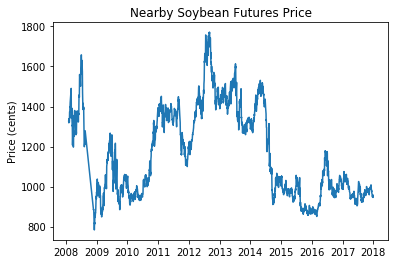

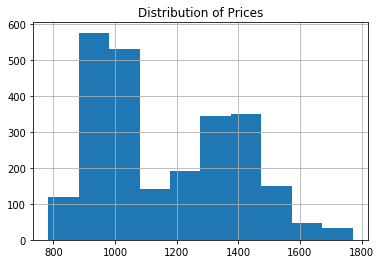

            Open     High      Low    Close  Volume  OpenInt  TotalOpenInt
dates                                                                     
2010-11-12   0.0  1093.50  1093.50  1093.50     0.0      0.0      636147.0
2010-11-15   0.0  1107.00  1107.00  1107.00     0.0      0.0      636604.0
2010-11-16   0.0  1067.00  1067.00  1067.00     0.0      0.0      628018.0
2010-11-17   0.0  1054.00  1054.00  1054.00     0.0      0.0      617458.0
2010-11-18   0.0  1081.25  1081.25  1081.25     0.0      0.0      612503.0


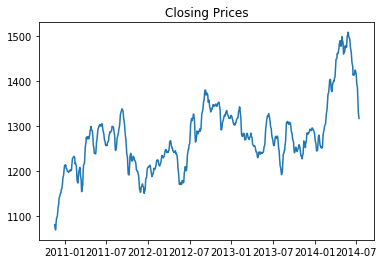

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

######################################
### NEARBY CONTRACT CLOSING PRICES ###
######################################
### i.e FUTURES ###
### nearby_close; 2477 rows; 2008-2017
### contract value at date-x in future made on date-y in the present? how far apart are dates?

soyNear = pd.read_csv('./input/soybean_nearby.txt') 
soyNear['dates'] = pd.to_datetime(soyNear['dates'])
soyNear.set_index('dates', drop=True, inplace = True)
soyNear = soyNear.sort_index()

print(soyNear.head())

plt.plot(soyNear.index, soyNear.rolling(window=1).mean())
plt.title('Nearby Soybean Futures Price')
plt.ylabel('Price (cents)')
plt.show()

soyNear.nearby_close.hist()
plt.title('Distribution of Prices')
plt.show()

### SPOT PRICES ###
OHLC = pd.read_csv('./input/soybean_JUL14.txt') 
OHLC['dates'] = pd.to_datetime(OHLC['dates'])
OHLC.set_index('dates', drop=True, inplace = True)
OHLC = OHLC.sort_index()

print(OHLC.head())
plt.plot(OHLC.index, OHLC.Close.rolling(window=5).mean())
plt.title('Closing Prices')
plt.show()
#open, high, low, close, volume, opentInt, and TotalOpenInt; 942 rows; 2010-2014



In [1]:
### Merge data-sets: SPOT prices with FUTURES prices ###
#print(OHLC.head())
#print(soyNear.head())
#OHLC.merge(soyNear, on = 'dates', left_index = True).shape #942, 8
prices = OHLC.merge(soyNear, on = 'dates', how = 'left', left_index = True)

print(prices.head())
prices_vars = ['High','Low','Close','nearby_close']
plt.plot(prices.loc[:,prices_vars])
plt.legend(prices_vars)

NameError: name 'OHLC' is not defined

(118, 69)


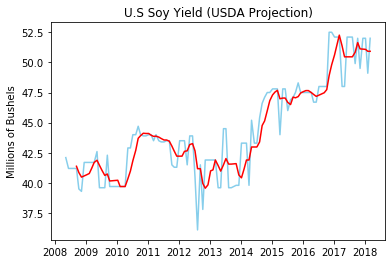

In [4]:
#Area Planted, Area Harvested, Yield, 
#Beginning Stocks, Production, Imports, Total Supply, Crushings, Exports, Seed, Residual, Total Use, Ending Stocks, 
# World Beginning Stocks, World Production, World Imports, World DomesticCrush, World DomesticTotal, World Exports, World EndingStocks, 
### World, United States, Argentina, Brazil, China, Japan, Mexico, EU ###
#Beginning Stocks
#Production
#Imports
#DomesticCrush
#DomesticTotal
#Exports
#Ending Stocks

soyfiles = [file for file in os.listdir('./input') if 'USDAProj_Soybean' in file]
soyData = [pd.read_csv('./input/' + file) for file in soyfiles]
df1 = pd.concat(soyData)

######################################
### LOOKING AT VARIABLES OVER TIME ###
######################################
df1.rename({'Date':'dates'}, axis = 'columns', inplace = True)
df1['dates'] = pd.to_datetime(df1['dates'])
df1.set_index('dates', drop=True, inplace = True)
df1 = df1.sort_index()

### Some WASDE dates more than one row of values - 
#the second one is the projection at the time of publication  
dfs = []
for i, df in df1.groupby(pd.Grouper(freq='1M')):    
    try:
        dfs.append(df.iloc[1])
    except:
        pass
df1 = pd.concat(dfs, axis = 1).transpose()
print(df1.shape)

#df1['Yield-Annual'] = df1.groupby(pd.Grouper(freq='Y')).Yield.transform('mean')
df1['Yield-Smooth'] = df1.Yield.rolling(window=5).mean()

### YIELD ###
plt.plot(df1.index, df1.Yield, color='skyblue')
plt.plot(df1.index, df1['Yield-Smooth'], color='red')

plt.title('U.S Soy Yield (USDA Projection)')
plt.ylabel('Millions of Bushels')
plt.show()


# plt.plot(df1.index, df1['Area Harvested'])
# plt.show()

# plt.plot(df1.index, df1['Area Planted'])
# plt.show()

#Date, datetime,
#visualization
 
##df1.iloc[len(df1)-12:]
#df1.loc['2014-03-10']
#Can compare some results with homie's notebook here --
#https://www.kaggle.com/nicewinter/soybean-wsde-analysibs

In [9]:
### STOCKS TO USE RATIO ###
### Ending Stocks / Total Use ###

df1['StocksToUse'] = df1['Ending Stocks']/df1['Total Use']

plt.subplots(figsize(15,5))
plt.plot(df1.index, df1.StocksToUse)

NameError: name 'figsize' is not defined

In [34]:
# soyfiles.sort()

# for file in soyfiles:
#     df = pd.read_csv('./input/' + file)
#     print(file, df['Date'].head(1), df['Date'].tail(1))


USDAProj_Soybean_2007to2008.csv 0    2007/05/11
Name: Date, dtype: object 23    2009/04/09
Name: Date, dtype: object
USDAProj_Soybean_2008to2009.csv 0    2008/05/09
Name: Date, dtype: object 23    2010/04/09
Name: Date, dtype: object
USDAProj_Soybean_2009to2010.csv 0    2009/05/12
Name: Date, dtype: object 23    2011/04/08
Name: Date, dtype: object
USDAProj_Soybean_2010to2011.csv 0    2010/05/11
Name: Date, dtype: object 23    2012/04/10
Name: Date, dtype: object
USDAProj_Soybean_2011to2012.csv 0    2011/05/11
Name: Date, dtype: object 23    2013/04/10
Name: Date, dtype: object
USDAProj_Soybean_2012to2013.csv 0    2012/05/10
Name: Date, dtype: object 22    2014/04/09
Name: Date, dtype: object
USDAProj_Soybean_2013to2014.csv 0    2013/05/10
Name: Date, dtype: object 22    2015/04/09
Name: Date, dtype: object
USDAProj_Soybean_2014to2015.csv 0    2014/05/09
Name: Date, dtype: object 23    2016/04/12
Name: Date, dtype: object
USDAProj_Soybean_2015to2016.csv 0    2015/05/12
Name: Date, dtyp